In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import graphviz

In [2]:
# Load the dataset
data = pd.read_csv('heart.csv')
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

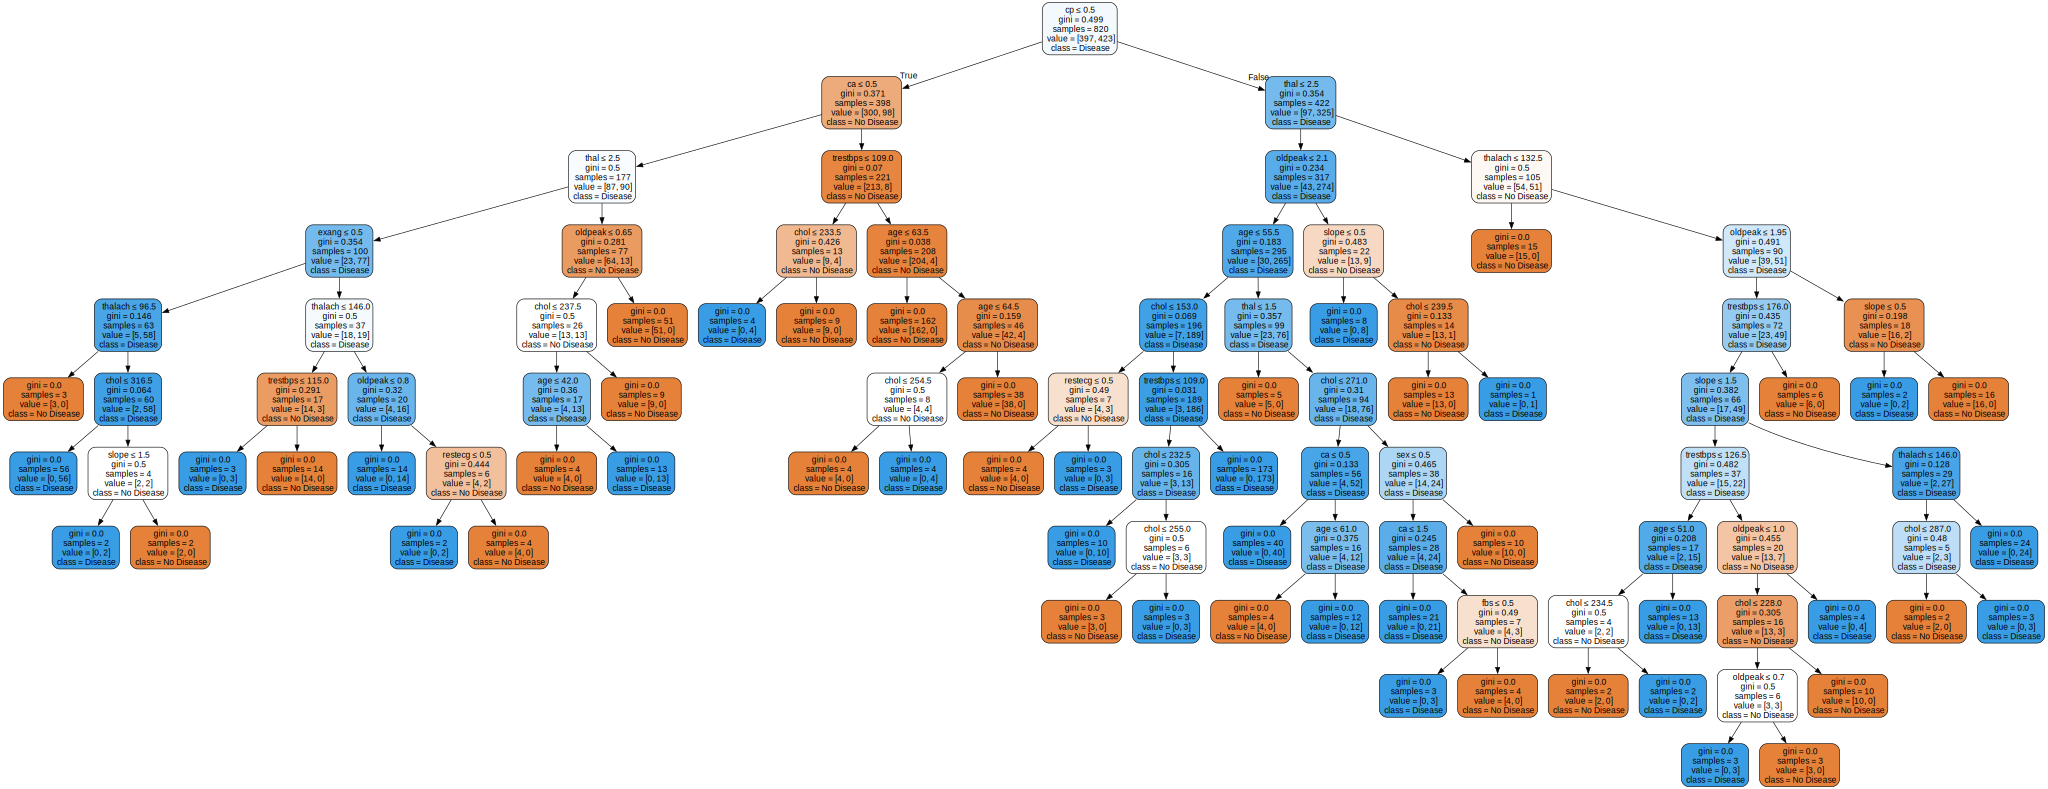

In [5]:
# Visualize the Decision Tree
data_g = export_graphviz(dt_classifier, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No Disease', 'Disease'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(data_g)  
graph.render("decision_tree_heart")  # Save the tree as a PDF
graph

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Analyze overfitting by controlling tree depth
max_depths = range(1, 11)
train_accuracies = []
test_accuracies = []

In [8]:
for depth in max_depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    train_accuracies.append(dt_classifier.score(X_train, y_train))
    test_accuracies.append(dt_classifier.score(X_test, y_test))

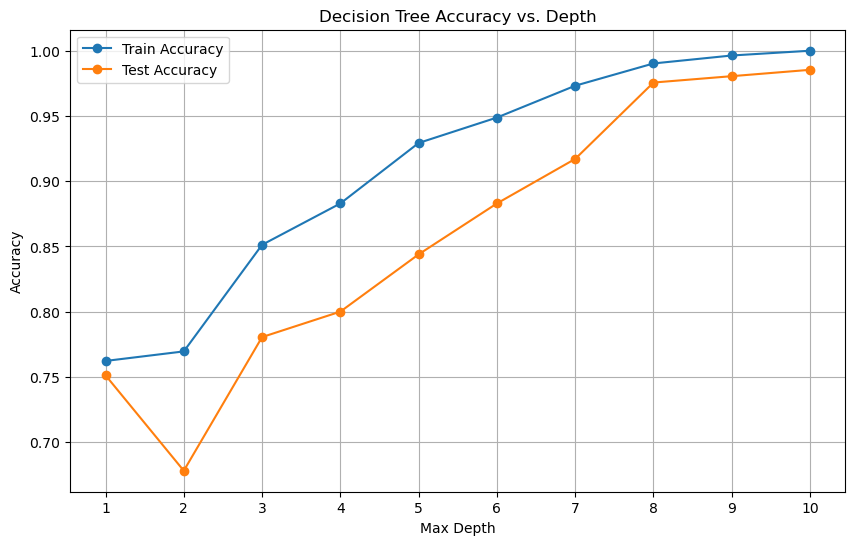

In [9]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.legend()
plt.grid()
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Compare accuracy
rf_train_accuracy = rf_classifier.score(X_train, y_train)
rf_test_accuracy = rf_classifier.score(X_test, y_test)

print(f"Random Forest Train Accuracy: {rf_train_accuracy:.2f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")

Random Forest Train Accuracy: 1.00
Random Forest Test Accuracy: 0.99


In [12]:
# Get feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

In [13]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

Feature ranking:
1. cp (0.1351)
2. ca (0.1273)
3. thalach (0.1222)
4. oldpeak (0.1219)
5. thal (0.1105)
6. age (0.0779)
7. chol (0.0748)
8. trestbps (0.0712)
9. exang (0.0576)
10. slope (0.0458)
11. sex (0.0287)
12. restecg (0.0186)
13. fbs (0.0084)


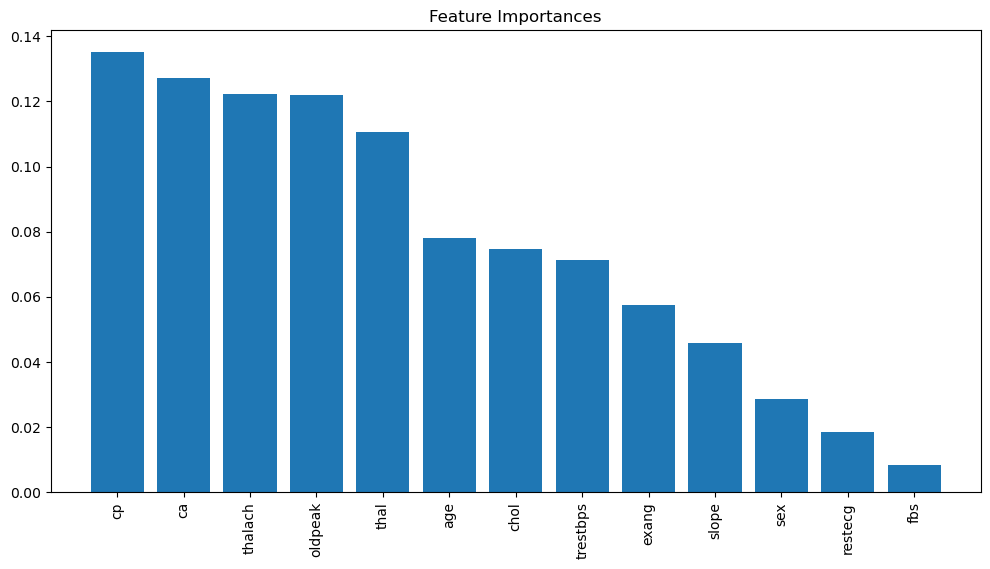

In [14]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean Cross-Validation Score: 1.00
